<a href="https://colab.research.google.com/github/ajayn3300/ML-Capstone-Unsupervised---Clustering/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#necessary libraries will be imported as per requirement

# Importing file

In [3]:
#importing data
data=pd.read_excel('/content/drive/MyDrive/Copy of Online_Retail.xlsx')

# get to know about data : 

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#data shape
data.shape

(541909, 8)

      Approx 5.5 lakh data points and 8 features

In [6]:
# description of data
data.describe([0.25,.50,0.75,0.90,0.95])

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
90%,24.000000,7.950000,17719.000000
95%,29.000000,9.950000,17905.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
#info of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Total numbers of customers
data['CustomerID'].nunique()

4372

In [9]:
# data of time period we have
print('The data we have is from  {}  to  {}'.format(data['InvoiceDate'].min(),data['InvoiceDate'].max()))

The data we have is from  2010-12-01 08:26:00  to  2011-12-09 12:50:00


# ***Data Wrangling and Creating Data Pipelines   :***

In [10]:
# checking null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
#let's check out these null values
data[data['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


    Let's remove this first

In [12]:
#remove null values with Description
data=data[~data['Description'].isna()]

#Let's check
data[data['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [13]:
# Let's check null values in customerID
data[data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [14]:
# Let's remove null values in Customer ID
data=data[~data['CustomerID'].isna()]

In [15]:
# Let's check null values again
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

    NUll  values settled

In [16]:
# Adding year,month and day column in dataframe
data['year']=data['InvoiceDate'].dt.year  # year
data['month']=data['InvoiceDate'].dt.month   #month
data['day']=data['InvoiceDate'].dt.day   # day

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1


***Changing Negative Quantity to positive :***

In [18]:
# negative quantity to positive 
data['Quantity']=abs(data['Quantity'])

# Anomaly Detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

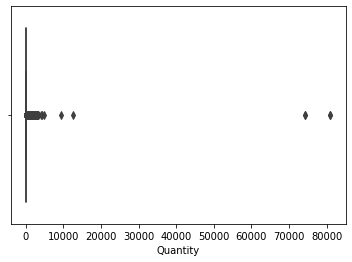

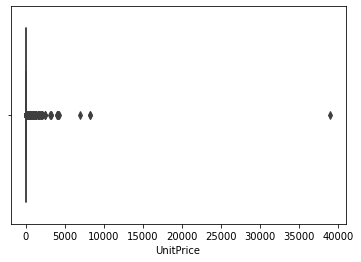

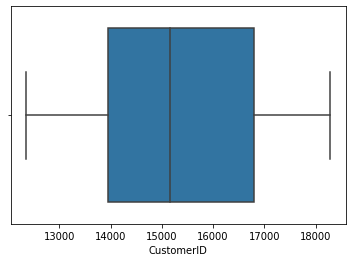

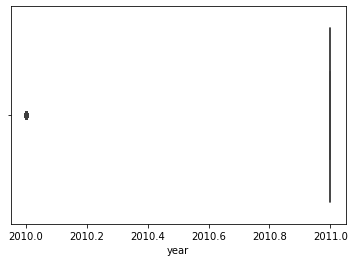

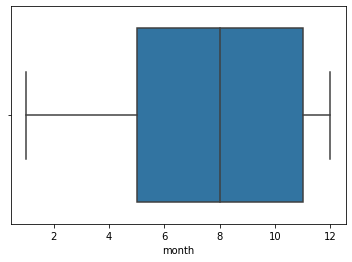

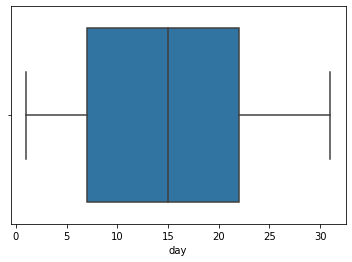

In [19]:
# outliers 
for i,j in enumerate(data.describe().columns):
  plt.figure(i+1)
  sns.boxplot(data[j])

    This is based on univariate analysis,but we need to remove anomalies based on multivariate

In [66]:
# Anomalies detection
from sklearn.ensemble import IsolationForest       #

# initiating model class
detector=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.1,max_features=2)

# fit_transform
detector.fit(data[data.describe().columns])



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.1, max_features=2)

In [67]:
#adding columns which will tell if the that data point is anomaly or not
data['iforest']=detector.predict(data[data.describe().columns])

In [68]:
# Let's see  sample
data.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,iforest
323577,565320,22349,DOG BOWL CHASING BALL DESIGN,6,2011-09-02 13:10:00,3.75,16745.0,United Kingdom,2011,9,2,1


In [69]:
# Let's remove datapoint with values negative one
data=data[data['iforest']!=-1]

In [70]:
# sample
data.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,iforest
285687,561917,21162,TOXIC AREA DOOR HANGER,1,2011-08-01 11:57:00,0.39,16904.0,United Kingdom,2011,8,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

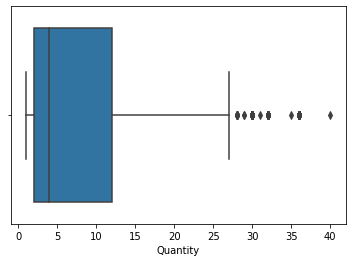

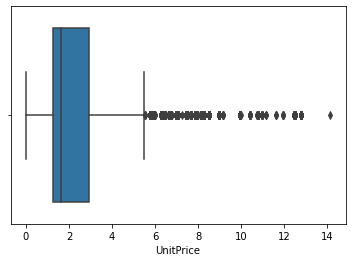

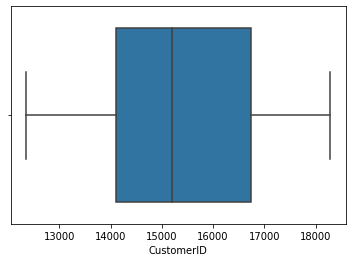

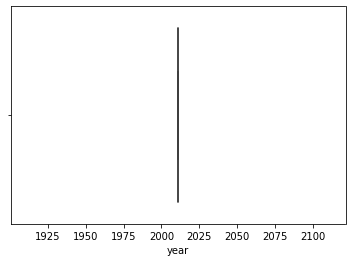

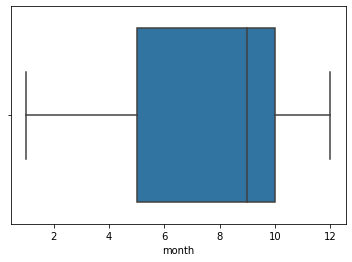

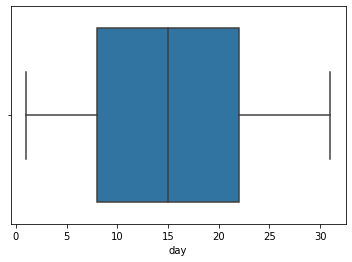

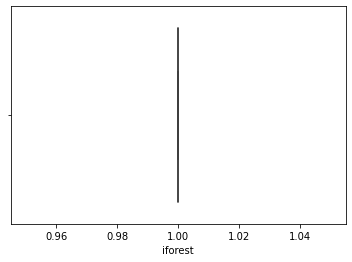

In [72]:
# Let's plot features again
for i,j in enumerate(data.describe().columns):
  plt.figure(i+1)
  sns.boxplot(data[j])

    See , now  we have better graphs 

In [73]:
# remvoing i forest column
data.drop(columns=['iforest'],inplace=True)

In [74]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011,1,4
42488,539993,22961,JAM MAKING SET PRINTED,12,2011-01-04 10:00:00,1.45,13313.0,United Kingdom,2011,1,4
42489,539993,22667,RECIPE BOX RETROSPOT,6,2011-01-04 10:00:00,2.95,13313.0,United Kingdom,2011,1,4
42491,539993,22896,PEG BAG APPLES DESIGN,6,2011-01-04 10:00:00,2.55,13313.0,United Kingdom,2011,1,4
42492,539993,22303,COFFEE MUG APPLES DESIGN,6,2011-01-04 10:00:00,2.55,13313.0,United Kingdom,2011,1,4


# Data Scaling


In [75]:
# first lets save our numeric columns
x_names=data.describe().columns
print(x_names)
#let's scale data
from sklearn.preprocessing import StandardScaler        # library 

# initiate class 
scaler=StandardScaler()

#fit_transform
x=scaler.fit_transform(data[x_names])


Index(['Quantity', 'UnitPrice', 'CustomerID', 'year', 'month', 'day'], dtype='object')


In [76]:
#let's check x
x

array([[ 0.56728798, -0.60863623, -1.24462293,  0.        , -2.13989039,
        -1.35838806],
       [ 0.90203664, -0.49496991, -1.24462293,  0.        , -2.13989039,
        -1.35838806],
       [-0.10220933,  0.35752748, -1.24462293,  0.        , -2.13989039,
        -1.35838806],
       ...,
       [-0.10220933, -0.12555437, -1.63557914,  0.        ,  1.39437716,
        -0.76301294],
       [-0.43695799,  1.03952539, -1.63557914,  0.        ,  1.39437716,
        -0.76301294],
       [-0.43695799,  1.03952539, -1.63557914,  0.        ,  1.39437716,
        -0.76301294]])

# **Splitting data into train and test**

In [77]:
# train test split library
from sklearn.model_selection import train_test_split

#split
train,test=train_test_split(x,test_size=0.2,random_state=0)

In [78]:
train.shape

(234332, 6)

In [79]:
test.shape

(58584, 6)

# ***Let's cluster  :>***


In [80]:
# library
from sklearn.cluster import KMeans

#initiate model
clusterer=KMeans()

#fit
clusterer.fit(train)

KMeans()

In [81]:
# Let,s predict
clusters=clusterer.predict(train)

In [82]:
#clusters
set(clusters)

{0, 1, 2, 3, 4, 5, 6, 7}

          We have 8 clusters here

# **Let's find out the best numbers of cluster**


We will iterate some number of cluster and with the help of elbow method ,we will select best numbers of cluster 

In [83]:
# we will iterate over 15 cluster and see the inertia score

inertia=[]        # for saving inertia score at every cluster

for i in range(1,21):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(train)
  inertia.append(kmeans.inertia_) 


In [84]:
inertia

[1170701.2918106408,
 967330.04097895,
 823935.9300072934,
 705148.1832183208,
 618855.2035435415,
 552599.349244716,
 506478.32132320106,
 469385.3037850086,
 447102.6780829035,
 422965.2120622685,
 404304.83530408586,
 388023.81086549384,
 373151.8739159807,
 358057.47309951903,
 346135.82790306595,
 334347.5630029414,
 323882.3601155553,
 314791.1701997488,
 305587.3667162941,
 296836.9533904398]

      let's plot for best cluster picking 

Text(0.5, 0, '<<<< No.of Clusters >>>>')

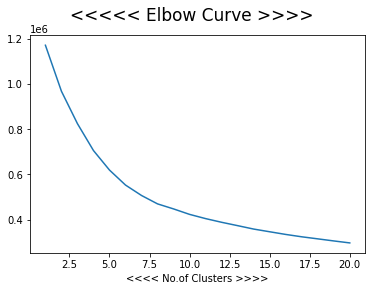

In [85]:
plt.plot(range(1,21),inertia)
plt.suptitle('<<<<< Elbow Curve >>>>',fontsize=17)
plt.xlabel('<<<< No.of Clusters >>>>')


       The best no. of clusters wil be 5,let's apply it again

In [86]:
#intiate class with 5 clusters
model=KMeans(n_clusters=5)
model.fit(train)

KMeans(n_clusters=5)

In [87]:
#train preds
train_preds=model.predict(train)

#test preds
test_preds=model.predict(test)

In [88]:
# converting to dataframe
train=pd.DataFrame(train)

#adding column names
train.columns=data.describe().columns

# adding clusters columns to train dataframe
train['clusters']=train_preds

In [89]:
# converting to dataframe
test=pd.DataFrame(test)

#adding column names
test.columns=data.describe().columns

# adding clusters columns to train dataframe
test['clusters']=test_preds

In [90]:
# joining both test and train
new=pd.concat([train,test])

Text(0.5, 0.92, 'simple 3D scatter plot')

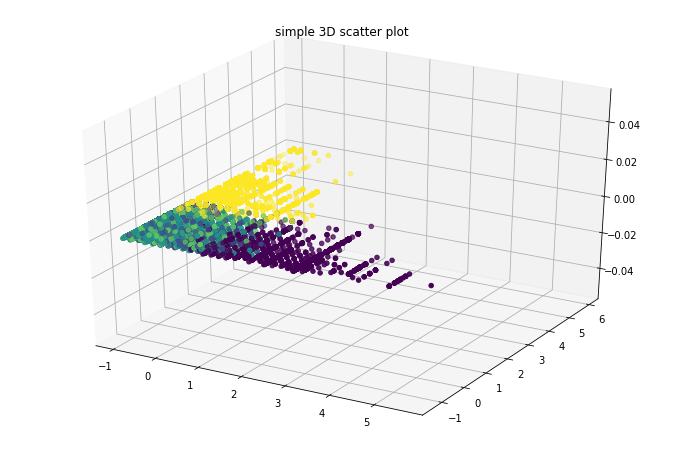

In [91]:
#plotting   for train data
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection ="3d")


ax.scatter3D(train['Quantity'], train['UnitPrice'], train['year'], c= train['clusters'])
plt.title("simple 3D scatter plot")

        You can see 5 color 

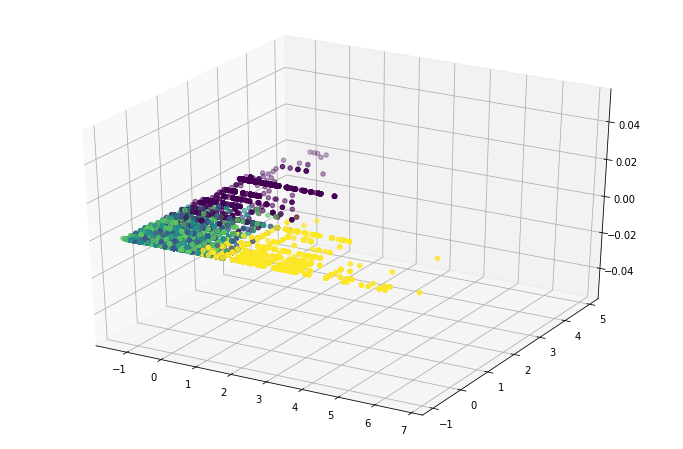

In [92]:
# for test data 
from mpl_toolkits import mplot3d
plt.figure(figsize=(12,8))
ax=plt.axes(projection='3d')

ax.scatter3D(test['UnitPrice'],test['Quantity'],test['year'],c=test['clusters'])